In [1]:
import torch.cuda
import sys

sys.path.append('..')
SEED=1

from src.henry.mnist_vae_pure import VariationalAutoencoder
import torchvision
import torchvision.datasets as datasets
import pickle
from matplotlib import pyplot as plt
import numpy as np
from utils import * 
from federated_pure import federate




In [2]:
class FakeArgs:
    def __init__(self):
        self.seed=1
        self.epochs = 20
        self.dataset = "mnist"
        self.num_users=10
        self.iid = 2
        self.dirichlet = 0.5
        self.local_ep=10
        self.local_bs=32
    

In [3]:
# vae, ovr_losses, mse_losses, kl_losses = vae.train_model(dataset_train,16,10)
# print(mse_losses)
# print(kl_losses)
# 46 -> 34
res = federate(FakeArgs())
res.serialise("orig_test",FakeArgs())





/home/henry/anaconda3/envs/rp/lib/python3.12/site-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
  0%|          | 0/20 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 19876.62871785802
Finished local epoch 2 out of 10, average loss across batches: 18097.741783802903
Finished local epoch 3 out of 10, average loss across batches: 17720.207223486712
Finished local epoch 4 out of 10, average loss across batches: 17520.792618879183
Finished local epoch 5 out of 10, average loss across batches: 17349.616537739912
Finished local epoch 6 out of 10, average loss across batches: 17219.444974163387
Finished local epoch 7 out of 10, average loss across batches: 17108.22681625246
Finished local epoch 8 out of 10, average loss across batches: 17035.384104330707
Finished local epoch 9 out of 10, average loss across batches: 16967.6258419968
Finished local epoch 10 out of 10, average loss across batches: 16919.909291184795
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 19236.921282087053
Finished local

  0%|          | 0/20 [00:40<?, ?it/s]


KeyboardInterrupt: 

In [4]:
def plot_reconstructed(autoencoder, r0=(-5, 10), r1=(-10, 5), n=12):
    w = 28
    img = np.zeros((n*w, n*w))
    for i, y in enumerate(np.linspace(*r1, n)):
        for j, x in enumerate(np.linspace(*r0, n)):
            z = torch.Tensor([[x, y]]).to('cuda')
            x_hat = autoencoder.decoder(z)
            x_hat = x_hat.reshape(28, 28).to('cpu').detach().numpy()
            img[(n-1-i)*w:(n-1-i+1)*w, j*w:(j+1)*w] = x_hat
    plt.imshow(img, extent=[*r0, *r1])

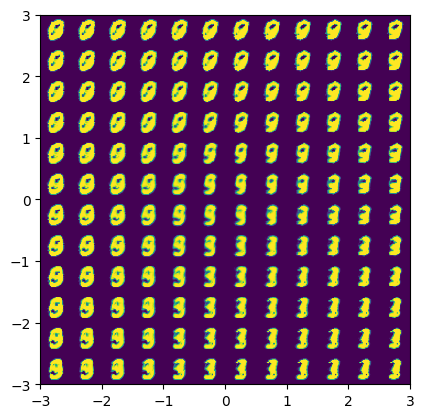

In [6]:
plot_reconstructed(global_model, r0=(-3, 3), r1=(-3, 3))


In [7]:
calculate_new_weights(global_model.encoder, client_datasets, 0.5)


[0.18895033657600524,
 0.2330736001954809,
 0.2138578487226814,
 0.18278210988408627,
 0.18133610462174626]